## 支持向量機SVM(Support Vector Machine)是有監督的分類預測模型




In [17]:
from sklearn import datasets
# 交叉驗證
from sklearn import cross_validation
# SVM
from sklearn import svm
# matplotlib 繪圖
import matplotlib.pyplot as plt
# 混淆矩陣
from sklearn import metrics

/home/wei/.local/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [20]:
# load 數據集
digits = datasets.load_digits()
print(digits)

{'data': array([[  0.,   0.,   5., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,  10.,   0.,   0.],
       [  0.,   0.,   0., ...,  16.,   9.,   0.],
       ..., 
       [  0.,   0.,   1., ...,   6.,   0.,   0.],
       [  0.,   0.,   2., ...,  12.,   0.,   0.],
       [  0.,   0.,  10., ...,  12.,   1.,   0.]]), 'images': array([[[  0.,   0.,   5., ...,   1.,   0.,   0.],
        [  0.,   0.,  13., ...,  15.,   5.,   0.],
        [  0.,   3.,  15., ...,  11.,   8.,   0.],
        ..., 
        [  0.,   4.,  11., ...,  12.,   7.,   0.],
        [  0.,   2.,  14., ...,  12.,   0.,   0.],
        [  0.,   0.,   6., ...,   0.,   0.,   0.]],

       [[  0.,   0.,   0., ...,   5.,   0.,   0.],
        [  0.,   0.,   0., ...,   9.,   0.,   0.],
        [  0.,   0.,   3., ...,   6.,   0.,   0.],
        ..., 
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   1., ...,   6.,   0.,   0.],
        [  0.,   0.,   0., ...,  10.,   0.,   0.]],

       [[  0.,   0.,  

In [43]:
# 以數據集中的數字2矩陣 為例 8*8 (矩陣)顏色 
digits.data[2]

array([  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
        16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.,   8.,  16.,
         0.,   0.,   0.,   0.,   1.,   6.,  15.,  11.,   0.,   0.,   0.,
         1.,   8.,  13.,  15.,   1.,   0.,   0.,   0.,   9.,  16.,  16.,
         5.,   0.,   0.,   0.,   0.,   3.,  13.,  16.,  16.,  11.,   5.,
         0.,   0.,   0.,   0.,   3.,  11.,  16.,   9.,   0.])

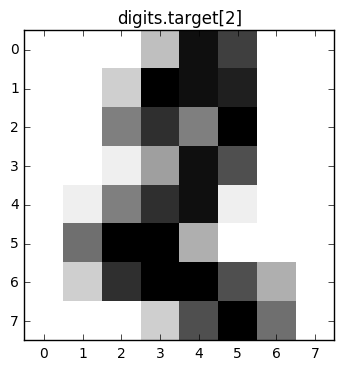

In [56]:
#繪製圖表查看數據集中數字9的圖像  cmap = 調整顏色, 馬賽克形式 nearest,sinc...etc
plt.imshow(digits.images[2], cmap=plt.cm.gray_r,interpolation='nearest')
plt.title('digits.target[2]')
plt.show()

In [57]:
# 看有幾個分類
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [58]:
#使用reshape函數對矩陣進行轉換(行列互換)，並賦值給X
y=digits.target
n_samples = len(digits.images)
x=digits.images.reshape((n_samples,64))
print(x)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [59]:
#查看特徵值X和預測目標Y的行數，共有1797行，
#也就是說數據集中共有1797個手寫數字的圖像，64列是經過我們轉化後的灰度值。

x.shape,y.shape

((1797, 64), (1797,))

In [60]:
#隨機抽取生成訓練集和測試集，其中訓練集的比例為60%，測試集40%

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x, y, test_size=0.4, random_state=0)

#查看分割後的測試集數據，共有1078條數據。這些數據將用來訓練SVM模型
#查看訓練集的行數

x_train.shape,y_train.shape

((1078, 64), (1078,))

 ## SVM模型進行訓練

In [65]:
#生成SVM分類模型
clf = svm.SVC(gamma=0.001)
#使用訓練集對svm分類模型進行訓練

clf.fit(x_train, y_train)




SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [66]:
#使用測試集測對模型進行測試
clf.score(x_test, y_test)

0.99304589707927682

In [67]:
#使用測試集的特徵X，也就是每個手寫數字的64個灰度值代入到模型中，讓SVM模型進行分類
#對測試集數據進行預測

predicted = clf.predict(x_test)
predicted[:20]  # 前20個

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8])

In [70]:
#查看測試集中的真實結果

expected=y_test
expected[:20]

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5, 2, 8, 6, 6, 6, 6, 1, 0, 5, 8])

## 混淆矩陣來看下SVM模型對所有測試集數據的預測與真實結果的準確率情況



In [71]:
#生成準確率的混淆矩陣(Confusion matrix)

metrics.confusion_matrix(expected, predicted)



array([[60,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 73,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1, 69,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0, 70,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 63,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 87,  1,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0, 76,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 65,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 77,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 74]])